# Estimate sample parameters to create BigFive cutpoints

This highly experimental notebook aims to estimate the cutpoints for the Open Personality Inventory. At the end, it will store a json file used by the VueJS component.

In [1]:
import pandas as pd
import seaborn as sns 
from pandas.io.json import json_normalize
import os

In [2]:
data = pd.read_json('db/open-bigfive-ipip100-export.json')
data.head()

,ipip100
-LlnvcVn0ii9VTADDKpL,"[{'factor': 1, 'label': 'Eu sou a alma da fest..."
-LlqA981UaUuE8LK2EAR,"[{'factor': 1, 'label': 'Eu sou a alma da fest..."
-LlqAhDj2BLzX3d57eBJ,"[{'factor': 1, 'label': 'Eu sou a alma da fest..."
-LlqEmnsaFdTtPvEElKN,"[{'factor': 1, 'label': 'Eu sou a alma da fest..."
-LlqF-GXxQx6avvzIKi6,"[{'factor': 1, 'label': 'Eu sou a alma da fest..."


In [3]:
my_list = data['ipip100'].tolist()

In [4]:
subject = json_normalize(my_list[41])
subject['answer'] = pd.to_numeric(subject['value'])
subject.head()

,factor,label,reversed,value,answer
0,1,Eu sou a alma da festa.,True,4,4
1,2,Eu sou grosseiro(a) com as pessoas,False,4,4
2,3,Eu estou sempre pronto(a).,True,3,3
3,4,Eu me estresso facilmente.,False,0,0
4,5,Eu tenho um vocabulário rico.,True,0,0


In [5]:
subject.groupby(by='factor')[['answer']].sum()

,answer
factor,
1,4
2,4
3,3
4,0
5,0


In [6]:
results = []
factor_one, factor_two, factor_three, factor_four, factor_five = [], [], [], [], []
for i in range(len(my_list)):
    subject = json_normalize(my_list[i])
    subject['answer'] = pd.to_numeric(subject['value'])
    result = subject.groupby(by='factor')[['answer']].sum()
    results.append(result)

for i in range(len(results)):
    factor_one.append(results[i]['answer'][1])
    factor_two.append(results[i]['answer'][2])
    factor_three.append(results[i]['answer'][3])
    factor_four.append(results[i]['answer'][4])
    factor_five.append(results[i]['answer'][5])

In [7]:
data_dictionary = {'f_one': factor_one, 
                   'f_two': factor_two,
                   'f_three': factor_three,
                   'f_four': factor_four,
                   'f_five': factor_five}

df = pd.DataFrame(data_dictionary)
df.tail()

,f_one,f_two,f_three,f_four,f_five
152,48,69,63,69,73
153,39,86,86,73,68
154,2,0,0,0,0
155,3,0,0,0,0
156,2,0,0,0,0


In [8]:
df.describe()

,f_one,f_two,f_three,f_four,f_five
count,157.000000,157.000000,157.000000,157.000000,157.000000
mean,36.987261,45.566879,40.834395,33.025478,40.993631
std,31.668756,38.496133,35.426675,30.636192,33.446762
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,3.000000
50%,39.000000,66.000000,54.000000,35.000000,57.000000
75%,64.000000,80.000000,73.000000,61.000000,71.000000
max,98.000000,97.000000,97.000000,92.000000,92.000000


In [9]:
# Filter out test cases
df = df[df.f_one > 20 ]
df.describe()

,f_one,f_two,f_three,f_four,f_five
count,92.000000,92.000000,92.000000,92.000000,92.000000
mean,61.434783,76.804348,69.065217,55.576087,68.250000
std,16.000896,12.480525,14.275010,19.104820,10.030311
min,25.000000,33.000000,26.000000,20.000000,42.000000
25%,50.000000,72.000000,60.000000,41.000000,61.000000
50%,62.500000,79.000000,70.500000,55.000000,70.000000
75%,72.250000,85.250000,79.000000,73.250000,74.250000
max,98.000000,97.000000,97.000000,92.000000,92.000000


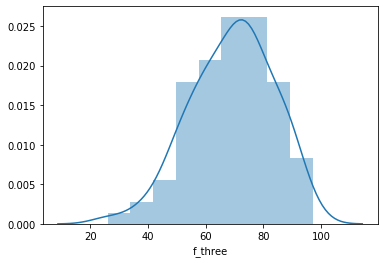

In [10]:
# Plotar Histogramas
sns.distplot(df['f_three'])

In [11]:
def half_sd(x):
    return { 'lower': round(x.mean() - x.std()/2, 1),
             'mean' : round(x.mean(),1),
             'upper': round(x.mean() + x.std()/2, 1)}

data_to_ipip100 = df[['f_one', 'f_two', 'f_three', 'f_four', 'f_five']].apply(half_sd)

In [12]:
data_to_ipip100.to_json(r'src/assets/sample_features.json')

In [13]:
os.getcwd()

'/home/henrique/github_repos/personality-big-five-ipip100'